In [1]:
import scipy.io
import seaborn as sns
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
for root, dirs, files in os.walk("prjct",topdown=False):
    for file_name in files:
        path = os.path.join(root, file_name)
        print(path)

prjct\trial_111.csv
prjct\Trial_112.csv
prjct\Trial_113.csv
prjct\Trial_114.csv
prjct\trial_115.csv
prjct\Trial_116.csv
prjct\Trial_117.csv
prjct\Trial_118.csv


In [3]:
path = r'prjct\trial_111.csv'
path

'prjct\\trial_111.csv'

In [4]:
df = pd.read_csv(path)
df.items

<bound method DataFrame.items of             Time  Accelerometer
0        0.00000       0.211409
1        0.00005       0.200000
2        0.00010       0.179902
3        0.00015       0.193010
4        0.00020       0.225479
...          ...            ...
395131  19.75655       0.112078
395132  19.75660       0.040526
395133  19.75665       0.145389
395134  19.75670       0.013469
395135  19.75675      -0.023450

[395136 rows x 2 columns]>

In [5]:
list(df.keys())

['Time', 'Accelerometer']

In [6]:
key_name = list(df.keys())[1]
key_name

'Accelerometer'

In [7]:
DE_data = df.get(key_name)
DE_data

0         0.211409
1         0.200000
2         0.179902
3         0.193010
4         0.225479
            ...   
395131    0.112078
395132    0.040526
395133    0.145389
395134    0.013469
395135   -0.023450
Name: Accelerometer, Length: 395136, dtype: float64

In [8]:
file_name

'Trial_118.csv'

In [9]:
A = np.full((len(DE_data), 1), file_name[:-4])

In [10]:
df_temp = pd.DataFrame({'DE_data':np.ravel(DE_data) , 'A':np.ravel(A)})

In [11]:
df_temp

,DE_data,A
0,0.211409,Trial_118
1,0.200000,Trial_118
2,0.179902,Trial_118
3,0.193010,Trial_118
4,0.225479,Trial_118
...,...,...
395131,0.112078,Trial_118
395132,0.040526,Trial_118
395133,0.145389,Trial_118
395134,0.013469,Trial_118


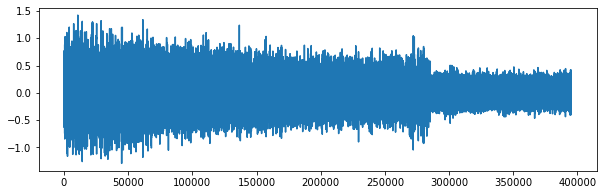

In [12]:
plt.figure(figsize=(10,3))
plt.plot(df_temp.iloc[:,0])
plt.show()

## mat==df && df==ddf

In [13]:
ddf=pd.DataFrame(columns=['DE_data','fault'])



In [14]:
for root, dirs, files in os.walk("prjct", topdown=False):
    for file_name in files:
        path = os.path.join(root, file_name)
        print(path)

        df = pd.read_csv(path)

        key_name = list(df.keys())[1]
        DE_data = df.get(key_name)
        fault = np.full((len(DE_data), 1), file_name[:-4])

        df_temp = pd.DataFrame({'DE_data':np.ravel(DE_data) , 'fault':np.ravel(fault)})
        
        ddf = pd.concat([ddf,df_temp],axis=0)
        print(ddf['fault'].unique())
        
ddf.to_csv('all_faults.csv',index=False) 

prjct\trial_111.csv
['trial_111']
prjct\Trial_112.csv
['trial_111' 'Trial_112']
prjct\Trial_113.csv
['trial_111' 'Trial_112' 'Trial_113']
prjct\Trial_114.csv
['trial_111' 'Trial_112' 'Trial_113' 'Trial_114']
prjct\trial_115.csv
['trial_111' 'Trial_112' 'Trial_113' 'Trial_114' 'trial_115']
prjct\Trial_116.csv
['trial_111' 'Trial_112' 'Trial_113' 'Trial_114' 'trial_115' 'Trial_116']
prjct\Trial_117.csv
['trial_111' 'Trial_112' 'Trial_113' 'Trial_114' 'trial_115' 'Trial_116'
 'Trial_117']
prjct\Trial_118.csv
['trial_111' 'Trial_112' 'Trial_113' 'Trial_114' 'trial_115' 'Trial_116'
 'Trial_117' 'Trial_118']


In [15]:
ddf = pd.read_csv('all_faults.csv',)

In [16]:
ddf

,DE_data,fault
0,0.211409,trial_111
1,0.200000,trial_111
2,0.179902,trial_111
3,0.193010,trial_111
4,0.225479,trial_111
...,...,...
3015931,-0.098850,Trial_118
3015932,-0.060729,Trial_118
3015933,-0.051349,Trial_118
3015934,-0.067584,Trial_118


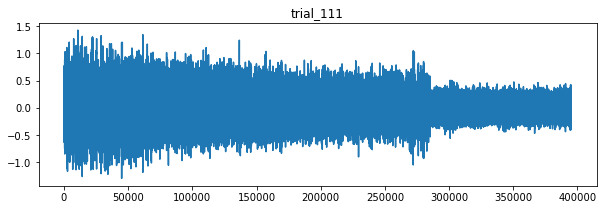

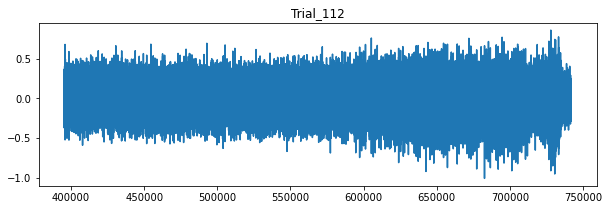

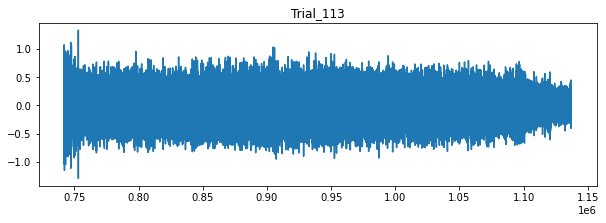

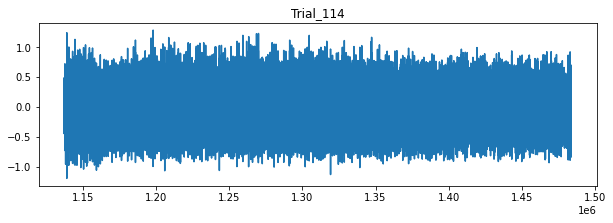

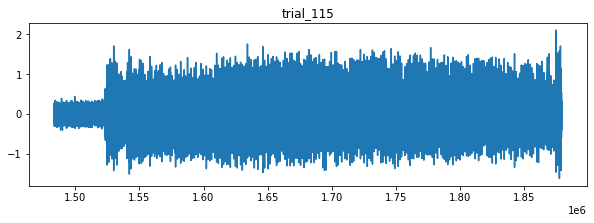

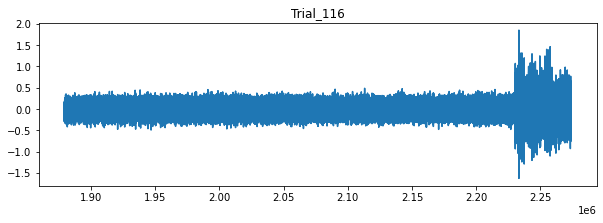

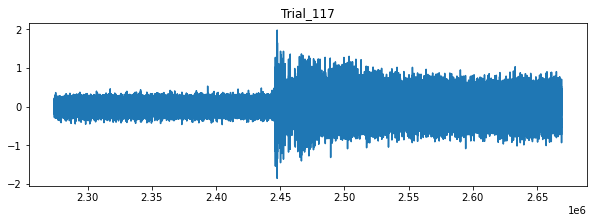

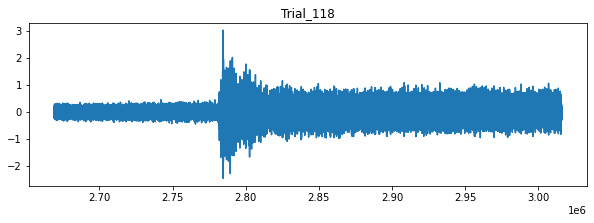

In [17]:
faults = ddf['fault'].unique()
for  f in faults:
    plt.figure(figsize=(10,3))
    plt.plot(ddf[ddf['fault']==f].iloc[:,0])
    plt.title(f)
    plt.show()

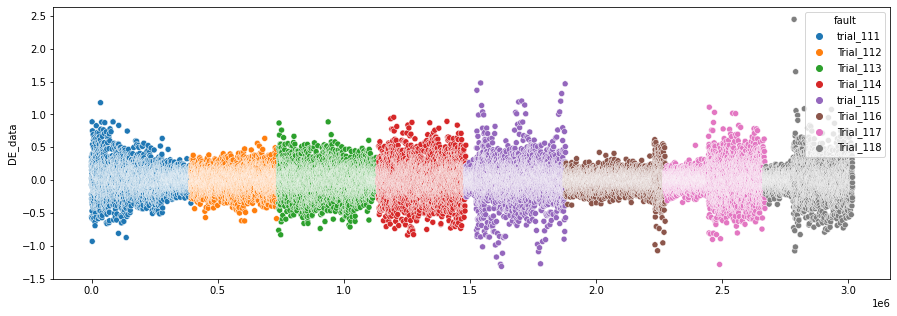

In [18]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=ddf.iloc[::100,:],y='DE_data',x=np.arange(0,len(ddf),100),hue='fault')
plt.show()

In [19]:
ddf

,DE_data,fault
0,0.211409,trial_111
1,0.200000,trial_111
2,0.179902,trial_111
3,0.193010,trial_111
4,0.225479,trial_111
...,...,...
3015931,-0.098850,Trial_118
3015932,-0.060729,Trial_118
3015933,-0.051349,Trial_118
3015934,-0.067584,Trial_118


In [20]:
ddf['fault'].unique()

array(['trial_111', 'Trial_112', 'Trial_113', 'Trial_114', 'trial_115',
       'Trial_116', 'Trial_117', 'Trial_118'], dtype=object)

In [21]:
ddf = pd.read_csv('all_faults.csv')

In [22]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

win_len=1000
stride=200

X=[]
Y=[]


for k in ddf['fault'].unique():
    
    df_temp_2 = ddf[ddf['fault']==k]
    
    for i in np.arange(0,len(df_temp_2)-(win_len),stride):
        temp = df_temp_2.iloc[i:i+win_len,:-1].values
        temp = temp.reshape((1,-1))
        X.append(temp)
        Y.append(df_temp_2.iloc[i+win_len,-1])
    
X=np.array(X)
X=X.reshape((X.shape[0],win_len))



Y=np.array(Y)
encoder= LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
OHE_Y = to_categorical(encoded_Y)

In [23]:
np.shape(X)

(15042, 1000)

In [24]:
X.shape

(15042, 1000)

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,OHE_Y,test_size=0.3,shuffle=True)

In [26]:
X = np.asarray(X, dtype='float32')
X_pre_aen = X
X_pre_aen

array([[ 0.2114092 ,  0.2       ,  0.17990224, ...,  0.3052085 ,
         0.20936485,  0.27454334],
       [ 0.35475376,  0.25674552,  0.33250648, ..., -0.15993983,
        -0.05988725,  0.09247649],
       [ 0.27562565,  0.05423523,  0.1319203 , ..., -0.12819238,
        -0.17773765, -0.3806087 ],
       ...,
       [-0.24796687, -0.20635846, -0.19505444, ..., -0.14671172,
        -0.04569709,  0.21561813],
       [ 0.05038706,  0.07900787,  0.02910183, ..., -0.21020664,
        -0.28043586, -0.17052232],
       [-0.01647501,  0.16150315,  0.13600898, ..., -0.02958286,
        -0.03439308, -0.08742576]], dtype=float32)

In [83]:
X2=np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]])